# Data Visualization with Python
### IBM Data Science Professional Certificate

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

### Task 1
In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://cocl.us/datascience_survey_data', sep=',', index_col=0)
print('Data read into DataFrame df')

df

Data read into DataFrame df


,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


### Task 2
Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
3. As for the chart:
    - use a figure size of (20, 8),
    - bar width of 0.8,
    - use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
    - use font size 14 for the bar labels, percentages, and legend,
    - use font size 16 for the title, and remove the left, top, and right borders.

In [4]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# Sort the dataframe in descending order of Very interested.
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

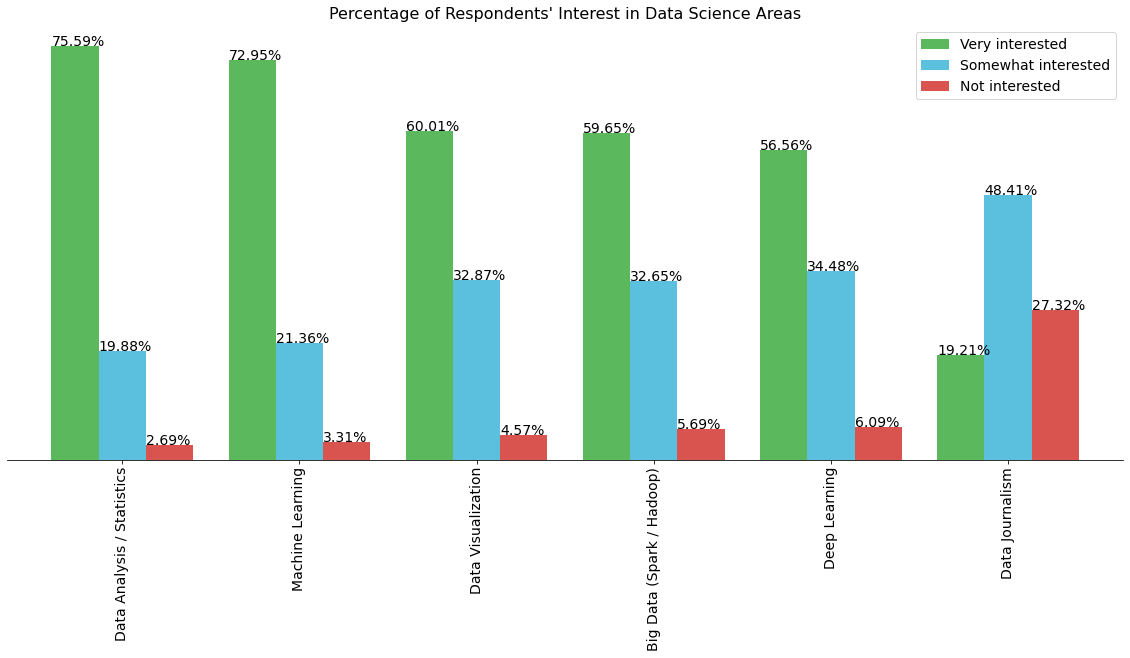

In [6]:
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", size=16) 
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.NullLocator())

# Convert the numbers into percentages of the total number of respondents. 
# Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.2%}'.format(height/2233), (x, y + height + 0.01), size=14)
ax.legend(fontsize=14)

plt.show()


## San Francisco Crime Dataset

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

1. Central,
2. Southern,
3. Bayview,
4. Mission,
5. Park,
6. Richmond,
7. Ingleside,
8. Taraval,
9. Northern, and,
10.Tenderloin.

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

### Task 3

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

In [7]:
# Read the csv file and convert to dataframe
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [8]:
df_incidents.shape

(150500, 13)

In [9]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [10]:
df_incidents.groupby(['PdDistrict']).groups.keys()
df_crime_nh = df_incidents.groupby('PdDistrict')['PdId'].count().reset_index()
df_crime_nh.rename(columns={'PdDistrict':'Neighborhood', 'PdId':'Count'}, inplace=True)

df_crime_nh

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


### Task 4
Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

- it is centred around San Francisco,
- you use a zoom level of 12,
- you use fill_color = 'YlOrRd',
- you define fill_opacity = 0.7,
- you define line_opacity=0.2, and,
- you define a legend and use the default threshold scale.

In [11]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [14]:
import urllib.request as request
import json

In [18]:
with request.urlopen('https://cocl.us/sanfran_geojson') as response:
        source = response.read()
        data = json.loads(source)

In [20]:
data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1, 'DISTRICT': 'CENTRAL', 'COMPANY': 'A'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-122.40532134644249, 37.806867516866724],
      [-122.40440122046421, 37.80885380837723],
      [-122.40438743872008, 37.80886519707406],
      [-122.40436730880846, 37.808872966044206],
      [-122.40434376667437, 37.808869624109605],
      [-122.40431429421082, 37.80881799170733],
      [-122.40394067997407, 37.80876198999871],
      [-122.40392016838871, 37.808754877186864],
      [-122.40390555965932, 37.808734021463344],
      [-122.40390814512642, 37.80871288836611],
      [-122.40471878715235, 37.80696905969842],
      [-122.4039597318324, 37.80657809724],
      [-122.4027673862454, 37.80801170771318],
      [-122.40274578869823, 37.80802322234157],
      [-122.40271771623641, 37.80802615647638],
      [-

In [21]:
sf_geo = data # geojson file

# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create a plain world map
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# generate choropleth map
sanfran_map.choropleth(
    geo_data=sf_geo,
    data=df_crime_nh,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Fransisco'
)

# display map
sanfran_map